## 讀取資料

In [1]:
import pandas

In [4]:
news = pandas.read_excel('data/20150628news.xlsx', index_col=0)

In [5]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [6]:
len(news)

147

## 建立詞頻矩陣

In [12]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    description = rec[1]['description']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(description)))
    titles.append(title)
    #print(corpus)
    #break

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [14]:
X

<147x11138 sparse matrix of type '<class 'numpy.int64'>'
	with 22639 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.metrics.pairwise import cosine_distances
n_cosine_similarities = cosine_distances(X)

In [18]:
n_cosine_similarities.shape

(147, 147)

In [73]:
from sklearn import cluster
km = cluster.KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
c = km.fit_predict(n_cosine_similarities)
c

array([0, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 3, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2], dtype=int32)

In [74]:
import numpy 
np_titles = numpy.array(titles)
#np_titles

In [75]:
for ele in np_titles[c == 3]:
    print(ele)

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


## 降低維度

In [81]:
?PCA

In [76]:
from sklearn.decomposition import PCA
clf = PCA(n_components= 2)
new_dim = clf.fit_transform(n_cosine_similarities)

In [80]:
new_dim.shape

(147, 2)

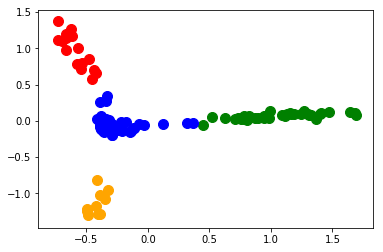

In [77]:
from matplotlib import pyplot as plt
plt.scatter(new_dim[c == 0, 0], new_dim[c == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(new_dim[c == 1, 0], new_dim[c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new_dim[c == 2, 0], new_dim[c == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(new_dim[c == 3, 0], new_dim[c == 3, 1], s = 100, c = 'orange', label = 'Cluster 3')


In [51]:
import numpy
numpy.random.seed(42)
numpy.random.randint(1, 42, 6)

array([39, 29, 15,  8, 21, 39])

In [79]:
a = numpy.array([70,80,90,60,50,80])
b = numpy.array([1 , 1, 1, 2, 2, 1])
a[b == 2]

array([60, 50])

## Silhouette Score

In [82]:
from sklearn.metrics import silhouette_score
km = cluster.KMeans(n_clusters = 4, init='k-means++', random_state=42)
c= km.fit_predict(n_cosine_similarities)
silhouette_score(n_cosine_similarities, labels = c)

0.27524158430186935

In [83]:
from sklearn.metrics import silhouette_score
sil_ary =  [] 
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c= km.fit_predict(n_cosine_similarities)
    s = silhouette_score(n_cosine_similarities, labels = c)
    sil_ary.append(s)

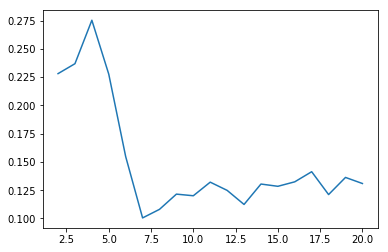

In [84]:
from matplotlib import pyplot as plt
plt.plot(range(2,21), sil_ary)

## 分析 2017/12/14 的新聞資料

In [88]:
import pandas
news = pandas.read_excel('data/20171214news.xlsx', index_col=0)
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [87]:
len(news)

899

In [90]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    content = rec[1]['content']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [92]:
X

<899x28936 sparse matrix of type '<class 'numpy.int64'>'
	with 122251 stored elements in Compressed Sparse Row format>

In [93]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [98]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
c = km.fit_predict(cs)

In [100]:
np_titles = numpy.array(titles)

In [111]:
for ele in np_titles[c == 8]:
    print(ele)

被爆賤賣中視讓利4.8億　馬英九回應了
徐永明：看來蔡正元不願再掩護馬英九
 回應北檢聲明　徐巧芯 ：不要事情鬧大了才推給媒體
「狗急跳牆亂咬人」溫紳說馬英九該告媒體
遭馬英九告洩密　北檢：嚴守偵查不公開
「忍無可忍」　馬英九怒告檢察長洩三中案不實秘密
李惠仁怒嗆：馬英九，你有什麼資格按鈴？！
馬英九反擊！不滿遭影射三中案有罪　馬親自到地檢署告北檢洩密
三中案馬英九圖利中時老闆？　北檢：不評論
藍營人士：北檢一再人格謀殺馬英九　「營造有罪氛圍」
三中案交易傳有馬英九讓利關鍵錄音　馬辦諷：宛如小說
三中案祕錄光碟！恐扳倒馬英九　當年他錄的
三中案500萬禮盒照　馬英九一句話成關鍵


In [112]:
from sklearn.metrics import silhouette_score
sil_ary =  [] 
for k in range(2,31):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c= km.fit_predict(cs)
    s = silhouette_score(cs, labels = c)
    sil_ary.append(s)

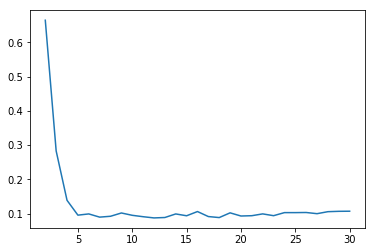

In [113]:
from matplotlib import pyplot as plt
plt.plot(range(2,31), sil_ary)

## 圖論

In [114]:
import networkx as nx
G = nx.Graph()

In [115]:
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')

In [116]:
G.add_edge('a', 'b')
G.add_edge('b', 'c')
G.add_edge('a', 'c')
G.add_edge('c', 'd')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consist

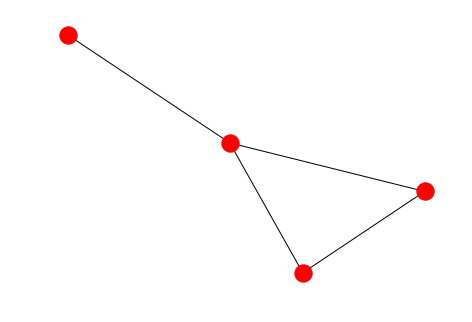

In [118]:
nx.draw(G)

In [120]:
X = nx.adjacency_matrix(G)
X.toarray()

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]], dtype=int64)

## 使用社群偵測法找分群

In [187]:
import pandas
news = pandas.read_excel('data/20171214news.xlsx', index_col=0)
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [188]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    content = rec[1]['content']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [190]:
X

<899x28936 sparse matrix of type '<class 'numpy.int64'>'
	with 122251 stored elements in Compressed Sparse Row format>

In [191]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [195]:
(cs > 0.4).astype(int)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [192]:
m = (cs > 0.4).astype(int)

In [156]:
m.sum().sum()

2597

## 安裝 Python-Louvain
- ! pip install python-louvain-master.zip

In [135]:
! pip install python-louvain-master.zip

Processing ./python-louvain-master.zip
  Running setup.py bdist_wheel for python-louvain ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/5d/ed/69/efc1cacbf21a1927775fcbd843c172aedc72ddbbb0e5986ec0
Successfully built python-louvain
  Found existing installation: python-louvain 0.11
    Uninstalling python-louvain-0.11:
      Successfully uninstalled python-louvain-0.11
You are using pip version 9.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [199]:
import networkx as nx
G = nx.from_numpy_matrix(m)

In [198]:
nx.graphml.write_graphml(G, 'news.graphml')

In [200]:
import community
comm = community.best_partition(G)
cluster_ary = numpy.array(list(comm.values()))

In [202]:
#cluster_ary

In [203]:
from collections import Counter
c = Counter(cluster_ary.tolist())
c.most_common(10)

[(3, 30),
 (39, 27),
 (63, 13),
 (131, 13),
 (106, 8),
 (171, 8),
 (20, 7),
 (181, 7),
 (495, 6),
 (7, 5)]

In [204]:
np_titles = numpy.array(titles)
for ele in np_titles[cluster_ary == 63]:
    print(ele)

被爆賤賣中視讓利4.8億　馬英九回應了
徐永明：看來蔡正元不願再掩護馬英九
 回應北檢聲明　徐巧芯 ：不要事情鬧大了才推給媒體
「狗急跳牆亂咬人」溫紳說馬英九該告媒體
遭馬英九告洩密　北檢：嚴守偵查不公開
「忍無可忍」　馬英九怒告檢察長洩三中案不實秘密
李惠仁怒嗆：馬英九，你有什麼資格按鈴？！
馬英九反擊！不滿遭影射三中案有罪　馬親自到地檢署告北檢洩密
三中案馬英九圖利中時老闆？　北檢：不評論
藍營人士：北檢一再人格謀殺馬英九　「營造有罪氛圍」
三中案交易傳有馬英九讓利關鍵錄音　馬辦諷：宛如小說
三中案祕錄光碟！恐扳倒馬英九　當年他錄的
三中案500萬禮盒照　馬英九一句話成關鍵


In [205]:
for k,v in c.most_common(10):
    #for ele in np_titles[cluster_ary == k][0]:
    #    print(ele)
    print('標題:',np_titles[cluster_ary == k][0], '文章數量:', v)
    print('=================================')

標題: 【特企】NGO聯名譴責中共迫害宗教信仰 文章數量: 30
標題: 「想抱孫要看天！」　他批小嫻婆婆殘忍強逼 文章數量: 27
標題: 被爆賤賣中視讓利4.8億　馬英九回應了 文章數量: 13
標題: 【美夢一場】美台軍艦互訪皆是空？　卜睿哲：川普不會執行 文章數量: 13
標題: 驚！　野生捕獲恐龍遛汪星人 文章數量: 8
標題: 【寒心動畫】南山全台大砍130人　「拿過模範員工也被犧牲！」 文章數量: 8
標題: 玉山清晨降雪　陽光露臉融化糖霜潤大地 文章數量: 7
標題: 【尊嚴片】被前女友譏諷「裝B」　他抓緊胯下崩潰 文章數量: 7
標題: 女星登Google熱搜人物第一　背後原因超心酸 文章數量: 6
標題: 【Fed告別秀】葉倫談比特幣　以7個字總結 文章數量: 5


In [212]:
numpy.asarray(X[cluster_ary == 39].sum(axis = 0))[0].shape

(28936,)

In [214]:
a = numpy.array([70,80,90,60,50])
a.argsort()[::-1]

array([2, 1, 0, 3, 4])

In [183]:
idx = numpy.asarray(X[cluster_ary == 39].sum(axis = 0))[0].argsort()[::-1][0:10]

In [184]:
feature_names = numpy.array(vectorizer.get_feature_names())

In [185]:
feature_names[idx]

array(['小嫻', '何守正', '離婚', '美國', '結婚', '自己', '妙禪', '時間', '報導', '何家'],
      dtype='<U18')

In [215]:
for k,v in c.most_common(10):
    #for ele in np_titles[cluster_ary == k][0]:
    #    print(ele)
    idx = numpy.asarray(X[cluster_ary == k].sum(axis = 0))[0].argsort()[::-1][0:10]
    print('標題:',np_titles[cluster_ary == k][0], '文章數量:', v)
    print('關鍵字:', ','.join(feature_names[idx].tolist()))
    print('=================================')

標題: 【特企】NGO聯名譴責中共迫害宗教信仰 文章數量: 30
關鍵字: 教會,全能,宗教,中國,自由,國際,組織,人權,政府,遭受
標題: 「想抱孫要看天！」　他批小嫻婆婆殘忍強逼 文章數量: 27
關鍵字: 小嫻,何守正,離婚,美國,結婚,自己,妙禪,時間,報導,何家
標題: 被爆賤賣中視讓利4.8億　馬英九回應了 文章數量: 13
關鍵字: 馬英九,北檢,報導,檢方,媒體,三中,前總統,偵查,國民黨,洩密
標題: 【美夢一場】美台軍艦互訪皆是空？　卜睿哲：川普不會執行 文章數量: 13
關鍵字: 台灣,美國,川普,國會,軍艦,總統,中國,美台,法案,關係
標題: 驚！　野生捕獲恐龍遛汪星人 文章數量: 8
關鍵字: ig,專頁,影片,網友,分享,網路,請上,日前,毛愛,綜合
標題: 【寒心動畫】南山全台大砍130人　「拿過模範員工也被犧牲！」 文章數量: 8
關鍵字: 人壽,業務員,友邦,南山,員工,通路,服務,公司,轉型,保戶
標題: 玉山清晨降雪　陽光露臉融化糖霜潤大地 文章數量: 7
關鍵字: 北部,玉山,氣溫,空氣,影響,天氣,中南部,地區,氣象局,東北
標題: 【尊嚴片】被前女友譏諷「裝B」　他抓緊胯下崩潰 文章數量: 7
關鍵字: 蘋果,中心,影創,甚至,就是,只要,影片,分享,選擇,本片
標題: 女星登Google熱搜人物第一　背後原因超心酸 文章數量: 6
關鍵字: 台灣,google,今年,冠軍,熱搜,快速,2017,流行語,搜尋,竄升
標題: 【Fed告別秀】葉倫談比特幣　以7個字總結 文章數量: 5
關鍵字: fed,美元,美國,升息,市場,預測,葉倫,預期,可能,明年


## 使用 TFIDF 矩陣做分群

In [218]:
import pandas
news = pandas.read_excel('data/20171214news.xlsx', index_col=0)
#news.head(3)

In [219]:
import jieba
corpus = []
titles = []
for rec in news.iterrows():
    content = rec[1]['content']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [221]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [226]:
m = (cs > 0.3).astype(int)

In [227]:
import networkx as nx
G = nx.from_numpy_matrix(m)

In [228]:
import community
comm = community.best_partition(G)
cluster_ary = numpy.array(list(comm.values()))

In [230]:
for k,v in c.most_common(10):
    idx = numpy.asarray(X[cluster_ary == k].sum(axis = 0))[0].argsort()[::-1][0:10]
    print('群:',k,'標題:',np_titles[cluster_ary == k][0], '文章數量:', v)
    print('關鍵字:', ','.join(feature_names[idx].tolist()))
    print('=================================')

群: 3 標題: 【特企】NGO聯名譴責中共迫害宗教信仰 文章數量: 30
關鍵字: 全能,教會,宗教,中國,自由,組織,迫害,人權,遭受,國際
群: 39 標題: 國防部解約慶富要提告　馮世寬怒嗆三遍：請便 文章數量: 27
關鍵字: 解約,國防部,慶富,獵雷艦,陳慶,預付款,契約,海軍,公司,馮世
群: 63 標題: 【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘 文章數量: 13
關鍵字: 前夫,離婚,贍養費,監護權,和解金,付出,兒子,萬元,陳美鳳,支付
群: 131 標題: 「一個地球高峰會」砸300億　力拚拒用油煤 文章數量: 13
關鍵字: 氣候,地球,馬克宏,協定,法國,高峰會,得主,峰會,美國,川普
群: 106 標題: 名模教主同台比美　46歲零皺紋挨批妖怪 文章數量: 8
關鍵字: 平子理沙,shiho,保養,完全,妖怪,美魔女,果汁,自然,節目,皺紋
群: 171 標題: 【有片】北市東區餐廳竄火　警消急疏散242民眾 文章數量: 8
關鍵字: 滅火,火勢,現場,燒烤,管路,拉水線,警消,好客,滅火器,242
群: 20 標題: 畢旅變調　高職生五星級飯店抓狂嘶吼就醫 文章數量: 7
關鍵字: 方姓,學生,同學,抓狂,警方,失控,壓制,清晨,飯店,直到
群: 181 標題: 「類豪宅」低空閃豪宅稅　北市這區量增最多 文章數量: 7
關鍵字: 豪宅,總價,揭露,交易,實價,萬元,單價,房屋,七期,豪宅稅
群: 495 標題: 【神奇片】這麼厲害？！印度政客：總理吃台灣蘑菇美白 文章數量: 6
關鍵字: 蘑菇,莫迪,印度,塔寇爾,要價,每天,台幣,最近,台灣,narendra
群: 7 標題: 我駐厄瓜多外館7月遭改名　外交部：現已中止雙方合作案 文章數量: 5
關鍵字: 外館,我方,厄瓜多,中華民國,改名,對方,牡蠣,巴林,奈及利亞,合作案


## 分群問題
有一資料集 20171003_applenews.xlsx
請試著將資料建立詞頻矩陣，必計算相似度
接者利用kmeans 與 community detection 方法，試著將資料作分群
並列出數量最高十個議題的標題與關鍵字?

In [236]:
import pandas
news = pandas.read_excel('data/20171003_applenews.xlsx', index_col=0)

In [237]:
len(news)

1020

In [238]:
news.head(3)

,category,clicked,content,time,title,url
0,生活,人氣(10103),（新增：事故現場圖）台鐵局編號114次、潮州開住七堵的pp自強號，於今日上午10時25分行駛...,2017-10-03 12:37:00,路人闖入遭自強號撞死 彰化至竹南站間一度延誤,http://www.appledaily.com.tw/realtimenews/arti...
1,社會,人氣(32608),（更新：影片、案情）阿羅哈客運上月12日凌晨在國道一號岡山交流道附近發生6死11傷重大車禍，...,2017-10-03 15:03:00,阿羅哈6死車禍肇因出爐 駕駛分神找東西釀禍,http://www.appledaily.com.tw/realtimenews/arti...
2,生活,人氣(3281),明天就是中秋節，北市開放河濱公園指定地點方便民眾烤肉賞月，台北市政府表示，平時已有指定區域開...,2017-10-03 12:48:00,北市中秋烤肉何處去 這些地點讓你挑,http://www.appledaily.com.tw/realtimenews/arti...


In [242]:
corpus = []
titles = []
for rec in news.iterrows():
    content = rec[1]['content']
    title = rec[1]['title']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [244]:
X

<1020x31601 sparse matrix of type '<class 'numpy.int64'>'
	with 127384 stored elements in Compressed Sparse Row format>

In [245]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

### KMeans

In [251]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=42)
cluster = km.fit_predict(cs)

In [247]:
np_titles = numpy.array(titles)

In [252]:
from collections import Counter
c = Counter(cluster)

In [257]:

#for k in c.keys():
#    print(f'第{k}群：')
#    print('==============================')
#    for i in np_titles[cluster == k]:
#        print(i)
#    print('==============================')

### Community Detection

In [259]:
m = (cs > 0.4).astype(int)

In [260]:
m.sum().sum()

1766

In [261]:
import networkx as nx
G = nx.from_numpy_matrix(m)

In [262]:
import community
comm = community.best_partition(G)

In [266]:
cluster_ary = numpy.array(list(comm.values()))

In [267]:
cluster_ary

array([  0,   1,   2, ..., 783, 784, 785])

In [268]:
from collections import Counter
c = Counter(cluster_ary)
c.most_common(10)

[(35, 23),
 (15, 18),
 (80, 16),
 (39, 13),
 (367, 11),
 (67, 7),
 (199, 7),
 (36, 6),
 (88, 6),
 (105, 6)]

In [271]:
feature_names =  numpy.array(vectorizer.get_feature_names())
for k,v in c.most_common(10):
    print('標題:',np_titles[cluster_ary == k][0], '聲量:',v )
    idx = numpy.asarray(X[cluster_ary == k].sum(axis = 0))[0].argsort()[::-1][0:10]
    print('關鍵字:', ','.join(feature_names[idx].tolist()))
    print('=============================================')

標題: 台積電如何分工？　傳魏哲家負責最大客戶蘋果、劉德音負責高通 聲量: 23
關鍵字: 台積電,張忠謀,董事長,退休,公司,台灣,半導體,表示,宣布,美國
標題: ​歷史之鑑下看加泰隆尼亞的獨立公投 聲量: 18
關鍵字: 加泰隆尼亞,獨立,西班牙,公投,政府,投票,自治區,民眾,警方,國家
標題: 與蔡英文變兩個太陽？　賴清德：各司其職分工非常好 聲量: 16
關鍵字: 蔡英文,總統,賴清德,民進黨,行政院長,專訪,中央社,接受,內閣,陳菊
標題: 美國賭城大屠殺　外交部：已向美方表達慰問與關懷 聲量: 13
關鍵字: 槍手,警方,美國,朵克,賭城,報導,國際,表示,槍擊案,飯店
標題: 他臉書羞辱護理師　護師工會開吉了 聲量: 11
關鍵字: 護理師,護士,護理,影片,人員,網友,臉書,可以,你們,陳睿明
標題: 狗狗溜滑梯 滑稽動作有夠萌 聲量: 7
關鍵字: 主人,更多,內容,粉絲,粉絲團,來源,圖片,facebook,專頁,毛愛
標題: 下午變天　新北宜花基防局部大雨 聲量: 7
關鍵字: 高溫,東北風,氣象局,北部,台北,影響,天氣,中南部,今天,東半部
標題: 豬哥老闆夜誘人妻　「陪1天送妳iPhone X」 聲量: 6
關鍵字: 蘋果,中心,影創,影音,看見,故事,報導,分享,禁止,舞台
標題: 遭女友閨密控性侵　男主角：她對我眉來眼去 聲量: 6
關鍵字: 小三,男友,女子,影片,閨密,長腿,姊妹,表示,旅館,新聞
標題: 國慶晚會宣傳影片無國旗國號　國民黨批林佳龍搞城市行銷 聲量: 6
關鍵字: 國旗,國慶,中華民國,沒有,陳菊,媒體,我們,邀請函,張老旺,文件


## 新聞分類

In [272]:
import pandas
news = pandas.read_excel('data/20171214news.xlsx', index_col=0)
news.head(3)

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」


In [275]:
news['category'].unique()

array(['政治', '論壇', '社會', '生活', '財經地產', '娛樂', '體育', '國際', '副刊', '動物', '3C',
       '壹週刊'], dtype=object)

In [321]:
corpus = []
titles = []
tags   = []
#for rec in news[news['category'].isin(['社會','娛樂','財經地產'])].iterrows():
for rec in news[news['category'].isin(['社會','娛樂'])].iterrows():

    content = rec[1]['content']
    title = rec[1]['title']
    category = rec[1]['category']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)
    tags.append(category)

In [322]:
len(titles)

247

In [323]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [324]:
X

<247x11380 sparse matrix of type '<class 'numpy.int64'>'
	with 30778 stored elements in Compressed Sparse Row format>

In [325]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y, train_titles, test_titles = train_test_split(X, tags, titles, test_size = 0.2, random_state = 42)

In [326]:
train_X.shape

(197, 11380)

In [327]:
test_X.shape

(50, 11380)

In [328]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.01)
clf.fit(train_X,train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [329]:
predicted = clf.predict(test_X)
predicted

array(['社會', '社會', '社會', '社會', '社會', '社會', '社會', '娛樂', '娛樂', '娛樂', '娛樂',
       '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '社會', '娛樂', '娛樂', '社會', '社會', '社會',
       '娛樂', '社會', '娛樂', '社會', '社會', '娛樂', '娛樂', '社會', '社會', '社會', '社會',
       '社會', '娛樂', '娛樂', '社會', '社會', '社會', '社會', '娛樂', '社會', '娛樂', '社會',
       '娛樂', '社會', '社會', '社會', '娛樂', '娛樂'], dtype='<U2')

In [330]:
print(test_y)

['社會', '社會', '社會', '社會', '社會', '社會', '社會', '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '娛樂', '社會', '娛樂', '娛樂', '社會', '社會', '社會', '娛樂', '社會', '娛樂', '社會', '社會', '娛樂', '娛樂', '社會', '社會', '社會', '社會', '社會', '娛樂', '娛樂', '社會', '社會', '社會', '社會', '娛樂', '社會', '娛樂', '社會', '娛樂', '社會', '社會', '社會', '娛樂', '娛樂']


In [331]:
(predicted == test_y).sum()/len(test_y)

1.0

In [332]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted)

1.0

In [333]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_y, predicted)

['娛樂' '社會']


array([[22,  0],
       [ 0, 28]])

In [334]:
#vectorizer.get_feature_names()

In [335]:
a = [1,2,3]
b = [5,6,7]
for rec in zip(a,b):
    print(rec)

(1, 5)
(2, 6)
(3, 7)


In [336]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(78.0, '男子', 0.0, 78.0)
(51.0, '新北', 0.0, 51.0)
(50.0, '警員', 0.0, 50.0)
(47.0, '突發', 0.0, 47.0)
(41.0, '機車', 0.0, 41.0)
(35.0, '少年', 0.0, 35.0)
(35.0, '檢方', 0.0, 35.0)
(34.0, '江男', 0.0, 34.0)
(34.0, '警方', 4.0, 170.0)
(32.0, '法官', 0.0, 32.0)
(32.0, '派出所', 0.0, 32.0)
(32.0, '陳姓', 0.0, 32.0)
(30.0, '張男', 0.0, 30.0)
(29.0, '時許', 0.0, 29.0)
(29.0, '警消', 0.0, 29.0)
(29.0, '陳男', 0.0, 29.0)
(28.0, '到場', 0.0, 28.0)
(28.0, '專線', 0.0, 28.0)
(28.0, '釐清', 0.0, 28.0)
(27.0, '林男', 0.0, 27.0)


In [337]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(27.0, '妙禪', 27.0, 0.0)
(24.0, '演出', 24.0, 0.0)
(22.0, '何家', 22.0, 0.0)
(17.0, '女星', 17.0, 0.0)
(17.0, '節目', 17.0, 0.0)
(17.0, '粉絲', 17.0, 0.0)
(15.0, '三姊', 15.0, 0.0)
(15.0, '娛樂', 15.0, 0.0)
(15.0, '媽寶', 15.0, 0.0)
(15.0, '電影', 15.0, 0.0)
(13.384615384615385, '小嫻', 174.0, 12.0)
(13.0, 'mv', 13.0, 0.0)
(13.0, '二姊', 13.0, 0.0)
(13.0, '最佳', 13.0, 0.0)
(12.5, '婆婆', 25.0, 1.0)
(12.0, '明年', 12.0, 0.0)
(12.0, '法國', 12.0, 0.0)
(11.0, '導演', 11.0, 0.0)
(11.0, '小三', 11.0, 0.0)
(11.0, '巴黎', 11.0, 0.0)


## appledaily break script
- https://gist.github.com/ywchiu/c2363caa0ae9261babeaea49e4a710fa

In [338]:
article = '''
Selina(任家萱)主持的談話性節目《女人28》，自8月2日(五)起，將在東森綜合台32頻道每週五晚間10點播出。過去Selina曾主持東森超視的節目—《小宇宙33號》和《五花八門金銀島》；固定嘉賓星座專家唐綺陽也在東森綜合和東森超視的節目擔任過主持和固定嘉賓，兩人都相當期待這次「回娘家」之後的化學反應。

Selina開心表示，之前主持的節目恰巧都和數字有關，打趣說：「是不是東森的高層有在迷信些什麼？」唐綺陽則笑虧自己：「你們終於又看上我了，我真的超開心的！」逗得現場眾人大笑不已。

七夕情人節將近，Selina跟唐綺陽被問是否有安排規劃時，唐綺陽開玩笑說：「你不覺得，七夕情人節在中元節的前一個禮拜是有意義的嗎？」Selina秒接：「沒過好七夕，就要過中元節！」兩人一搭一唱搞笑默契佳。

談到「大叔戀、姊弟戀」這兩種節目近期討論過的戀愛模式，Selina坦言仍傾向成熟的對象，「但我現在有點太成熟了，所以不是很清楚。」還埋伏筆說：「看我的下一段戀情是大叔戀還是姊弟戀，大家就知道了。」唐綺陽則幽默回：「跟我搭配的大叔應該都去過中元節了吧！」最後，單身的兩人都直呼：「有戀就好、有戀最大！」

「減肥」則是Selina與唐綺陽之間最有共鳴的話題，每次見面第一句話就是互道：「妳瘦了！」Selina說：「我們就是用這種方式安慰對方。」唐綺陽則笑說：「我們兩個有病！」有時候誇對方瘦了，對方還會回：「沒有沒有，我很胖！」彼此互相取暖，看得出兩人已培養出好交情。（葉文正／台北報導）
'''

In [339]:
query = ' '.join(jieba.cut(article))
W = vectorizer.transform([query])

In [340]:
clf.predict(W)

array(['娛樂'], dtype='<U2')

## 分類問題
有一資料集 20171003_applenews.xlsx
請試著將資料建立一分類模型
接者利用該模型嘗試預測文章article 屬於什麼類別?

In [341]:
article = '''
國內金融圈首批「鯰魚」出現，金管會主委顧立雄30日揭曉純網銀核准名單，結果是「統統有獎」，將來銀行、樂天國際銀行及連線銀行等三家申請者都獲准設立，預估8～20個月後正式開業，顧立雄希望三家純網銀的創新營運模式，也能帶動傳統銀行創新其數位金融服務。

三家純網銀估三到五年即可損益兩平，但顧立雄強調七大注意，一是純網銀帳戶24小時交易，會與央行商議，要求更高流動性準備，及純網銀須訂定緊急因應計畫；二是嚴禁「掠奪式競爭」，即純網銀沒實體分行，租金及人事成本已低，但若不顧資金成本、營運成本、風險胃納及合理利潤，用虧本競爭搶客戶，則金管會將會適度維持金融競爭秩序，第三到第七即注意信用風險、資安作業風險、社群或網路謠言要即時澄清的信譽風險、公司治理與消費者保護。

顧立雄表示，連線銀行鎖定Line的使用者，要透過Line朋友清單進行轉帳、分帳及相關金融服務，更有一站式全方位旅遊的金融商品與服務；將來銀行鎖定銀行低度關注的客戶與信用小白，透過小助手管理社群帳戶及應繳帳單，主打客戶可隨時查信用評分、線上智能審核可隨時動撥小額信貸額度。

樂天國際銀行主攻35～50歲白領客戶、樂天集團既有客戶、哈日族及智慧手機重度使用者，要主打樂天的超級點點、透過樂天Pay打通台日O2O體驗，還有台日外幣數位存款帳戶及提款卡，在日本可隨時在提款機提領日幣等。

原本強調最多只發出二張純網銀執照的金管會突然「大放送」，直接給三張執照，顧立雄以三大理由回應，一是三家申請者各有目標客群及創新營運方式，三家都是不同評審委員評出的第一名，總和分數亦達到核准門檻，就普惠金融及金融創新的角度，三家都有助提供客戶的便利性。

二是近期香港已陸續核出八家純網銀執照、新加坡宣布再開放五家，南韓除了現有兩家純網銀外，今年再度開放申請，顯示純網銀家數界線並非絕對，且以日本及南韓經驗來看，多年發展後，純網銀市占率仍低，對實體銀行與市場競爭影響有限。

三是當初開放純網銀時，因為凱基銀併萬泰銀、元大銀併大眾銀，39家國銀剩37家，今年澳盛銀子行移轉給星展銀，家數再少一家，即三家純網銀開業後，也只是39家，但顧立雄強調，暫不規畫開放第二波純網銀申請。

'''

In [342]:
news = pandas.read_excel('data/20171003_applenews.xlsx', index_col=0)

In [344]:
news.head(3)

,category,clicked,content,time,title,url
0,生活,人氣(10103),（新增：事故現場圖）台鐵局編號114次、潮州開住七堵的pp自強號，於今日上午10時25分行駛...,2017-10-03 12:37:00,路人闖入遭自強號撞死 彰化至竹南站間一度延誤,http://www.appledaily.com.tw/realtimenews/arti...
1,社會,人氣(32608),（更新：影片、案情）阿羅哈客運上月12日凌晨在國道一號岡山交流道附近發生6死11傷重大車禍，...,2017-10-03 15:03:00,阿羅哈6死車禍肇因出爐 駕駛分神找東西釀禍,http://www.appledaily.com.tw/realtimenews/arti...
2,生活,人氣(3281),明天就是中秋節，北市開放河濱公園指定地點方便民眾烤肉賞月，台北市政府表示，平時已有指定區域開...,2017-10-03 12:48:00,北市中秋烤肉何處去 這些地點讓你挑,http://www.appledaily.com.tw/realtimenews/arti...


In [346]:
corpus = []
titles = []
tags   = []
for rec in news.iterrows():
    content = rec[1]['content']
    title = rec[1]['title']
    category = rec[1]['category']
    corpus.append(' '.join(jieba.cut(content)))
    titles.append(title)
    tags.append(category)

In [348]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [349]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y, train_titles, test_titles = train_test_split(X, tags, titles, test_size = 0.2, random_state = 42)

In [350]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [351]:
predicted = clf.predict(test_X)

In [352]:
accuracy_score(test_y, predicted)

0.8284313725490197

In [354]:
print(clf.classes_)
confusion_matrix(test_y, predicted)

['3C' '副刊' '動物' '國際' '地產' '娛樂' '政治' '時尚' '生活' '社會' '論壇' '財經' '體育']


array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 34,  0,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  1,  1,  1,  0, 29,  6,  0,  3,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0,  0, 32,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  3,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

In [355]:
query = ' '.join(jieba.cut(article))
w = vectorizer.transform([query])

In [356]:
clf.predict(w)

array(['財經'], dtype='<U2')

## 情緒判斷

In [357]:
import pandas
movies = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [358]:
movies.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [359]:
movies['title'].unique()

array(['古墓奇兵', '最後的絕地武士', '攻殼機動隊', '奧創紀元', '最終騎士'], dtype=object)

In [363]:
corpus = []
tags   = []
for rec in movies[movies['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    tags.append(rec[1]['status'])

In [364]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [365]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.2, random_state = 42)

In [366]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [367]:
predicted = clf.predict(test_X)

In [368]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.7142857142857143

In [370]:
print(clf.classes_)

['bad' 'good']


In [369]:
confusion_matrix(test_y, predicted)

array([[51, 30],
       [26, 89]])

In [371]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(29.5, '垃圾', 59.0, 1.0)
(10.5, '先來', 21.0, 1.0)
(8.0, '穌化奶', 8.0, 0.0)
(7.5, '睡著', 45.0, 5.0)
(7.0, '一星', 14.0, 1.0)
(7.0, '演什麼', 14.0, 1.0)
(6.5, '麥可貝', 13.0, 1.0)
(5.333333333333333, '直接', 16.0, 2.0)
(5.0, '一通', 5.0, 0.0)
(5.0, '冗長', 5.0, 0.0)
(5.0, '半段', 5.0, 0.0)
(5.0, '四集', 10.0, 1.0)
(5.0, '留言', 25.0, 4.0)
(5.0, '超爛', 5.0, 0.0)
(4.8, '浪費', 24.0, 4.0)
(4.666666666666667, '工讀生', 28.0, 5.0)
(4.5, '亂七八糟', 9.0, 1.0)
(4.5, '博派', 9.0, 1.0)
(4.5, '卡登', 9.0, 1.0)
(4.5, '狂派', 9.0, 1.0)


In [372]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(15.0, '當然', 0.0, 15.0)
(15.0, '相當', 0.0, 15.0)
(14.0, '許多', 0.0, 14.0)
(12.5, '奧創', 1.0, 25.0)
(12.0, '寶石', 0.0, 12.0)
(11.0, 'the', 0.0, 11.0)
(11.0, '細節', 0.0, 11.0)
(10.0, '效果', 0.0, 10.0)
(10.0, '的確', 0.0, 10.0)
(10.0, '階段', 0.0, 10.0)
(9.0, 'be', 0.0, 9.0)
(9.0, 'https', 0.0, 9.0)
(9.0, '不同', 1.0, 18.0)
(9.0, '之間', 0.0, 9.0)
(9.0, '元素', 0.0, 9.0)
(9.0, '參考', 0.0, 9.0)
(9.0, '如此', 0.0, 9.0)
(9.0, '幻視', 0.0, 9.0)
(9.0, '版本', 0.0, 9.0)
(8.0, '成功', 0.0, 8.0)
